In [1]:
import pandas as pd
import pickle
from datasets import Dataset
from collections import Counter
from utils import id2label

In [2]:
df = pd.read_json('all.json')
history_dataset = df[df.genre=='history']
titles = history_dataset['title'].to_list()

In [3]:
# load
with open('models/logreg.pkl', 'rb') as f:
    model = pickle.load(f)
    
with open('models/tfidf_vectorizer.pkl', 'rb') as f:
    vect = pickle.load(f)

In [4]:
data = Dataset.from_pandas(history_dataset)
x_test = vect.transform(data['text'])
pred = model.predict_proba(x_test)

In [5]:
# id of paragraph where each chapter starts
titles_d = {}
for i in range(len(titles)):
    if titles[i] not in titles_d:
        titles_d[titles[i]] = i

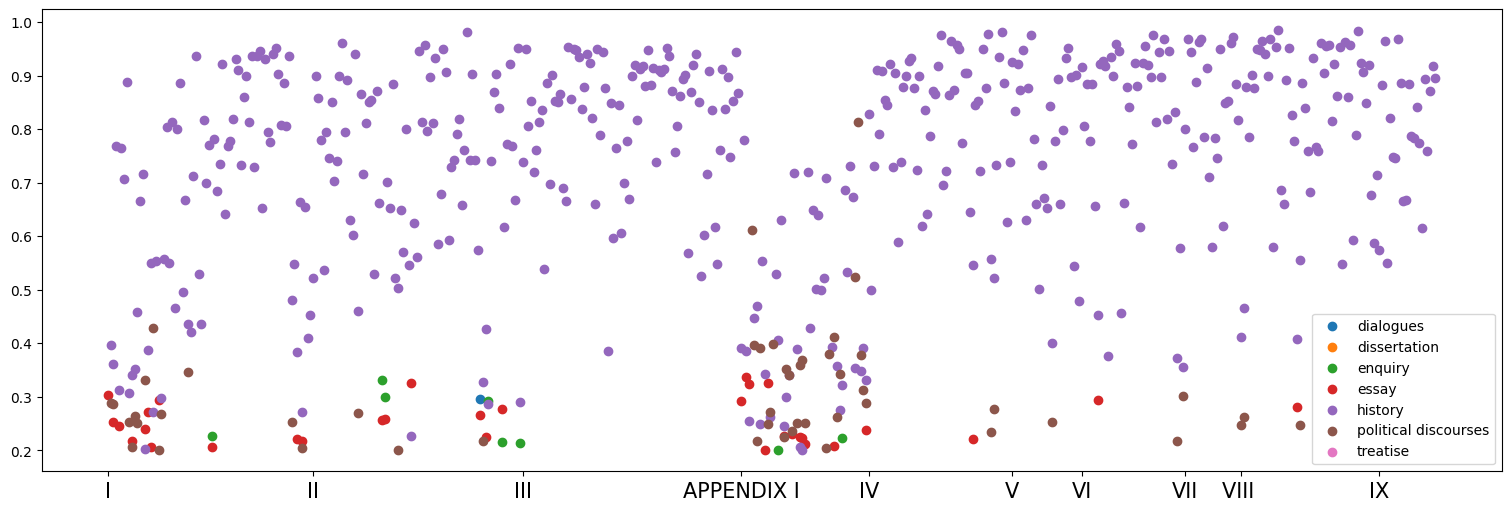

In [8]:
import matplotlib.pyplot as plt
import datetime
import numpy as np

fig, ax = plt.subplots(figsize=(15, 5), layout='constrained')

x = np.array([i for i in range(len(pred[:500]))])
for i in range(7):
    y = pred.T[i][:500]
    y = [v if v > 0.2 else None for v in y]
    ax.scatter(x,y, label=id2label[i])
    
ax.legend()
ax.xaxis.set_ticks([0, 77, 156, 238, 286, 340, 366, 405, 426, 478], labels=list(titles_d.keys())[:10], fontsize=15)